In [3]:
pip install FER


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd

In [8]:
location_videofile = "WIN_20220701_17_01_34_Pro.mp4"

# But the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [9]:
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:30.04 fps, 113 frames, 3.76 seconds
INFO:fer:Making directories at output
  0%|                                                                                      | 0/113 [00:00<?, ?frames/s]

1/1 [==============================] - 0s 98ms/step


  1%|▋                                                                             | 1/113 [00:02<03:48,  2.04s/frames]

1/1 [==============================] - 0s 20ms/step


  2%|█▍                                                                            | 2/113 [00:02<02:20,  1.26s/frames]

1/1 [==============================] - 0s 20ms/step


  3%|██                                                                            | 3/113 [00:03<01:53,  1.03s/frames]

1/1 [==============================] - 0s 19ms/step


  4%|██▊                                                                           | 4/113 [00:04<01:40,  1.08frames/s]

1/1 [==============================] - 0s 22ms/step


  4%|███▍                                                                          | 5/113 [00:04<01:32,  1.17frames/s]

1/1 [==============================] - 0s 19ms/step


  5%|████▏                                                                         | 6/113 [00:05<01:29,  1.19frames/s]

1/1 [==============================] - 0s 17ms/step


  6%|████▊                                                                         | 7/113 [00:06<01:24,  1.25frames/s]

1/1 [==============================] - 0s 19ms/step


  7%|█████▌                                                                        | 8/113 [00:07<01:20,  1.30frames/s]

1/1 [==============================] - 0s 19ms/step


  8%|██████▏                                                                       | 9/113 [00:07<01:18,  1.32frames/s]

1/1 [==============================] - 0s 18ms/step


  9%|██████▊                                                                      | 10/113 [00:08<01:16,  1.35frames/s]

1/1 [==============================] - 0s 20ms/step


 10%|███████▍                                                                     | 11/113 [00:09<01:14,  1.37frames/s]

1/1 [==============================] - 0s 19ms/step


 11%|████████▏                                                                    | 12/113 [00:10<01:12,  1.39frames/s]

1/1 [==============================] - 0s 19ms/step


 12%|████████▊                                                                    | 13/113 [00:10<01:14,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 12%|█████████▌                                                                   | 14/113 [00:11<01:12,  1.37frames/s]

1/1 [==============================] - 0s 18ms/step


 13%|██████████▏                                                                  | 15/113 [00:12<01:10,  1.40frames/s]

1/1 [==============================] - 0s 19ms/step


 14%|██████████▉                                                                  | 16/113 [00:12<01:09,  1.39frames/s]

1/1 [==============================] - 0s 20ms/step


 15%|███████████▌                                                                 | 17/113 [00:13<01:08,  1.40frames/s]

1/1 [==============================] - 0s 19ms/step


 16%|████████████▎                                                                | 18/113 [00:14<01:07,  1.40frames/s]

1/1 [==============================] - 0s 21ms/step


 17%|████████████▉                                                                | 19/113 [00:15<01:06,  1.41frames/s]

1/1 [==============================] - 0s 18ms/step


 18%|█████████████▋                                                               | 20/113 [00:15<01:06,  1.41frames/s]

1/1 [==============================] - 0s 20ms/step


 19%|██████████████▎                                                              | 21/113 [00:16<01:06,  1.39frames/s]

1/1 [==============================] - 0s 19ms/step


 19%|██████████████▉                                                              | 22/113 [00:17<01:05,  1.39frames/s]

1/1 [==============================] - 0s 20ms/step


 20%|███████████████▋                                                             | 23/113 [00:18<01:05,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 21%|████████████████▎                                                            | 24/113 [00:18<01:04,  1.38frames/s]

1/1 [==============================] - 0s 18ms/step


 22%|█████████████████                                                            | 25/113 [00:19<01:04,  1.37frames/s]

1/1 [==============================] - 0s 19ms/step


 23%|█████████████████▋                                                           | 26/113 [00:20<01:03,  1.36frames/s]

1/1 [==============================] - 0s 22ms/step


 24%|██████████████████▍                                                          | 27/113 [00:20<01:03,  1.36frames/s]

1/1 [==============================] - 0s 22ms/step


 25%|███████████████████                                                          | 28/113 [00:21<01:02,  1.36frames/s]

1/1 [==============================] - 0s 21ms/step


 26%|███████████████████▊                                                         | 29/113 [00:22<01:02,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 27%|████████████████████▍                                                        | 30/113 [00:23<01:02,  1.33frames/s]

1/1 [==============================] - 0s 20ms/step


 27%|█████████████████████                                                        | 31/113 [00:23<01:01,  1.33frames/s]

1/1 [==============================] - 0s 19ms/step


 28%|█████████████████████▊                                                       | 32/113 [00:24<01:01,  1.32frames/s]

1/1 [==============================] - 0s 17ms/step


 29%|██████████████████████▍                                                      | 33/113 [00:25<00:59,  1.35frames/s]

1/1 [==============================] - 0s 17ms/step


 30%|███████████████████████▏                                                     | 34/113 [00:26<00:57,  1.36frames/s]

1/1 [==============================] - 0s 19ms/step


 31%|███████████████████████▊                                                     | 35/113 [00:26<00:56,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 32%|████████████████████████▌                                                    | 36/113 [00:27<00:56,  1.37frames/s]

1/1 [==============================] - 0s 19ms/step


 33%|█████████████████████████▏                                                   | 37/113 [00:28<00:55,  1.36frames/s]

1/1 [==============================] - 0s 16ms/step


 34%|█████████████████████████▉                                                   | 38/113 [00:29<00:54,  1.38frames/s]

1/1 [==============================] - 0s 17ms/step


 35%|██████████████████████████▌                                                  | 39/113 [00:29<00:53,  1.38frames/s]

1/1 [==============================] - 0s 18ms/step


 35%|███████████████████████████▎                                                 | 40/113 [00:30<00:53,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 36%|███████████████████████████▉                                                 | 41/113 [00:31<00:52,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 37%|████████████████████████████▌                                                | 42/113 [00:31<00:51,  1.37frames/s]

1/1 [==============================] - 0s 16ms/step


 38%|█████████████████████████████▎                                               | 43/113 [00:32<00:50,  1.38frames/s]

1/1 [==============================] - 0s 19ms/step


 39%|█████████████████████████████▉                                               | 44/113 [00:33<00:50,  1.38frames/s]

1/1 [==============================] - 0s 18ms/step


 40%|██████████████████████████████▋                                              | 45/113 [00:34<00:49,  1.37frames/s]

1/1 [==============================] - 0s 20ms/step


 41%|███████████████████████████████▎                                             | 46/113 [00:34<00:49,  1.34frames/s]

1/1 [==============================] - 0s 19ms/step


 42%|████████████████████████████████                                             | 47/113 [00:35<00:48,  1.37frames/s]

1/1 [==============================] - 0s 19ms/step


 42%|████████████████████████████████▋                                            | 48/113 [00:36<00:47,  1.37frames/s]

1/1 [==============================] - 0s 19ms/step


 43%|█████████████████████████████████▍                                           | 49/113 [00:37<00:46,  1.39frames/s]

1/1 [==============================] - 0s 19ms/step


 44%|██████████████████████████████████                                           | 50/113 [00:37<00:45,  1.39frames/s]

1/1 [==============================] - 0s 18ms/step


 45%|██████████████████████████████████▊                                          | 51/113 [00:38<00:44,  1.40frames/s]

1/1 [==============================] - 0s 20ms/step


 46%|███████████████████████████████████▍                                         | 52/113 [00:39<00:43,  1.39frames/s]

1/1 [==============================] - 0s 18ms/step


 47%|████████████████████████████████████                                         | 53/113 [00:39<00:43,  1.39frames/s]

1/1 [==============================] - 0s 20ms/step


 48%|████████████████████████████████████▊                                        | 54/113 [00:40<00:42,  1.39frames/s]

1/1 [==============================] - 0s 19ms/step


 49%|█████████████████████████████████████▍                                       | 55/113 [00:41<00:41,  1.38frames/s]

1/1 [==============================] - 0s 21ms/step


 50%|██████████████████████████████████████▏                                      | 56/113 [00:42<00:41,  1.38frames/s]

1/1 [==============================] - 0s 21ms/step


 50%|██████████████████████████████████████▊                                      | 57/113 [00:42<00:41,  1.36frames/s]

1/1 [==============================] - 0s 20ms/step


 51%|███████████████████████████████████████▌                                     | 58/113 [00:43<00:41,  1.33frames/s]

1/1 [==============================] - 0s 20ms/step


 52%|████████████████████████████████████████▏                                    | 59/113 [00:44<00:40,  1.34frames/s]

1/1 [==============================] - 0s 23ms/step


 53%|████████████████████████████████████████▉                                    | 60/113 [00:45<00:39,  1.33frames/s]

1/1 [==============================] - 0s 20ms/step


 54%|█████████████████████████████████████████▌                                   | 61/113 [00:45<00:39,  1.33frames/s]

1/1 [==============================] - 0s 19ms/step


 55%|██████████████████████████████████████████▏                                  | 62/113 [00:46<00:38,  1.33frames/s]

1/1 [==============================] - 0s 23ms/step


 56%|██████████████████████████████████████████▉                                  | 63/113 [00:47<00:37,  1.32frames/s]

1/1 [==============================] - 0s 17ms/step


 57%|███████████████████████████████████████████▌                                 | 64/113 [00:48<00:37,  1.32frames/s]

1/1 [==============================] - 0s 21ms/step


 58%|████████████████████████████████████████████▎                                | 65/113 [00:49<00:39,  1.21frames/s]

1/1 [==============================] - 0s 19ms/step


 58%|████████████████████████████████████████████▉                                | 66/113 [00:49<00:37,  1.25frames/s]

1/1 [==============================] - 0s 20ms/step


 59%|█████████████████████████████████████████████▋                               | 67/113 [00:50<00:35,  1.28frames/s]

1/1 [==============================] - 0s 19ms/step


 60%|██████████████████████████████████████████████▎                              | 68/113 [00:51<00:34,  1.29frames/s]

1/1 [==============================] - 0s 19ms/step


 61%|███████████████████████████████████████████████                              | 69/113 [00:52<00:33,  1.30frames/s]

1/1 [==============================] - 0s 18ms/step


 62%|███████████████████████████████████████████████▋                             | 70/113 [00:52<00:32,  1.31frames/s]

1/1 [==============================] - 0s 19ms/step


 63%|████████████████████████████████████████████████▍                            | 71/113 [00:53<00:32,  1.31frames/s]

1/1 [==============================] - 0s 24ms/step


 64%|█████████████████████████████████████████████████                            | 72/113 [00:54<00:31,  1.31frames/s]

1/1 [==============================] - 0s 20ms/step


 65%|█████████████████████████████████████████████████▋                           | 73/113 [00:55<00:31,  1.27frames/s]

1/1 [==============================] - 0s 20ms/step


 65%|██████████████████████████████████████████████████▍                          | 74/113 [00:56<00:30,  1.28frames/s]

1/1 [==============================] - 0s 20ms/step


 66%|███████████████████████████████████████████████████                          | 75/113 [00:56<00:29,  1.29frames/s]

1/1 [==============================] - 0s 19ms/step


 67%|███████████████████████████████████████████████████▊                         | 76/113 [00:57<00:28,  1.32frames/s]

1/1 [==============================] - 0s 18ms/step


 68%|████████████████████████████████████████████████████▍                        | 77/113 [00:58<00:27,  1.32frames/s]

1/1 [==============================] - 0s 18ms/step


 69%|█████████████████████████████████████████████████████▏                       | 78/113 [00:59<00:26,  1.33frames/s]

1/1 [==============================] - 0s 20ms/step


 70%|█████████████████████████████████████████████████████▊                       | 79/113 [00:59<00:25,  1.34frames/s]

1/1 [==============================] - 0s 18ms/step


 71%|██████████████████████████████████████████████████████▌                      | 80/113 [01:00<00:24,  1.33frames/s]

1/1 [==============================] - 0s 19ms/step


 72%|███████████████████████████████████████████████████████▏                     | 81/113 [01:01<00:23,  1.34frames/s]

1/1 [==============================] - 0s 20ms/step


 73%|███████████████████████████████████████████████████████▉                     | 82/113 [01:02<00:23,  1.34frames/s]

1/1 [==============================] - 0s 20ms/step


 73%|████████████████████████████████████████████████████████▌                    | 83/113 [01:02<00:22,  1.33frames/s]

1/1 [==============================] - 0s 19ms/step


 74%|█████████████████████████████████████████████████████████▏                   | 84/113 [01:03<00:21,  1.34frames/s]

1/1 [==============================] - 0s 17ms/step


 75%|█████████████████████████████████████████████████████████▉                   | 85/113 [01:04<00:20,  1.35frames/s]

1/1 [==============================] - 0s 18ms/step


 76%|██████████████████████████████████████████████████████████▌                  | 86/113 [01:04<00:19,  1.37frames/s]

1/1 [==============================] - 0s 17ms/step


 77%|███████████████████████████████████████████████████████████▎                 | 87/113 [01:05<00:19,  1.34frames/s]

1/1 [==============================] - 0s 19ms/step


 78%|███████████████████████████████████████████████████████████▉                 | 88/113 [01:06<00:18,  1.35frames/s]

1/1 [==============================] - 0s 20ms/step


 79%|████████████████████████████████████████████████████████████▋                | 89/113 [01:07<00:17,  1.37frames/s]

1/1 [==============================] - 0s 18ms/step


 80%|█████████████████████████████████████████████████████████████▎               | 90/113 [01:07<00:17,  1.35frames/s]

1/1 [==============================] - 0s 18ms/step


 81%|██████████████████████████████████████████████████████████████               | 91/113 [01:08<00:16,  1.34frames/s]

1/1 [==============================] - 0s 20ms/step


 81%|██████████████████████████████████████████████████████████████▋              | 92/113 [01:09<00:15,  1.33frames/s]

1/1 [==============================] - 0s 20ms/step


 82%|███████████████████████████████████████████████████████████████▎             | 93/113 [01:10<00:14,  1.34frames/s]

1/1 [==============================] - 0s 17ms/step


 83%|████████████████████████████████████████████████████████████████             | 94/113 [01:10<00:14,  1.35frames/s]

1/1 [==============================] - 0s 20ms/step


 84%|████████████████████████████████████████████████████████████████▋            | 95/113 [01:11<00:13,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 85%|█████████████████████████████████████████████████████████████████▍           | 96/113 [01:12<00:12,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 86%|██████████████████████████████████████████████████████████████████           | 97/113 [01:13<00:11,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 87%|██████████████████████████████████████████████████████████████████▊          | 98/113 [01:13<00:11,  1.36frames/s]

1/1 [==============================] - 0s 20ms/step


 88%|███████████████████████████████████████████████████████████████████▍         | 99/113 [01:14<00:10,  1.35frames/s]

1/1 [==============================] - 0s 17ms/step


 88%|███████████████████████████████████████████████████████████████████▎        | 100/113 [01:15<00:09,  1.36frames/s]

1/1 [==============================] - 0s 19ms/step


 89%|███████████████████████████████████████████████████████████████████▉        | 101/113 [01:16<00:08,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 90%|████████████████████████████████████████████████████████████████████▌       | 102/113 [01:16<00:08,  1.35frames/s]

1/1 [==============================] - 0s 17ms/step


 91%|█████████████████████████████████████████████████████████████████████▎      | 103/113 [01:17<00:07,  1.37frames/s]

1/1 [==============================] - 0s 20ms/step


 92%|█████████████████████████████████████████████████████████████████████▉      | 104/113 [01:18<00:06,  1.36frames/s]

1/1 [==============================] - 0s 20ms/step


 93%|██████████████████████████████████████████████████████████████████████▌     | 105/113 [01:19<00:05,  1.36frames/s]

1/1 [==============================] - 0s 18ms/step


 94%|███████████████████████████████████████████████████████████████████████▎    | 106/113 [01:19<00:05,  1.35frames/s]

1/1 [==============================] - 0s 20ms/step


 95%|███████████████████████████████████████████████████████████████████████▉    | 107/113 [01:20<00:04,  1.36frames/s]

1/1 [==============================] - 0s 20ms/step


 96%|████████████████████████████████████████████████████████████████████████▋   | 108/113 [01:21<00:03,  1.37frames/s]

1/1 [==============================] - 0s 19ms/step


 96%|█████████████████████████████████████████████████████████████████████████▎  | 109/113 [01:21<00:02,  1.37frames/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████████████████████████████████████████████████████████████████████▉  | 110/113 [01:22<00:02,  1.35frames/s]

1/1 [==============================] - 0s 19ms/step


 98%|██████████████████████████████████████████████████████████████████████████▋ | 111/113 [01:23<00:01,  1.33frames/s]

1/1 [==============================] - 0s 20ms/step


 99%|███████████████████████████████████████████████████████████████████████████▎| 112/113 [01:24<00:00,  1.31frames/s]

1/1 [==============================] - 0s 17ms/step


100%|████████████████████████████████████████████████████████████████████████████| 113/113 [01:25<00:00,  1.33frames/s]
INFO:fer:Completed analysis: saved to output\WIN_20220701_17_01_34_Pro_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 44%
INFO:fer:Compressing: 88%
INFO:fer:Zip has finished


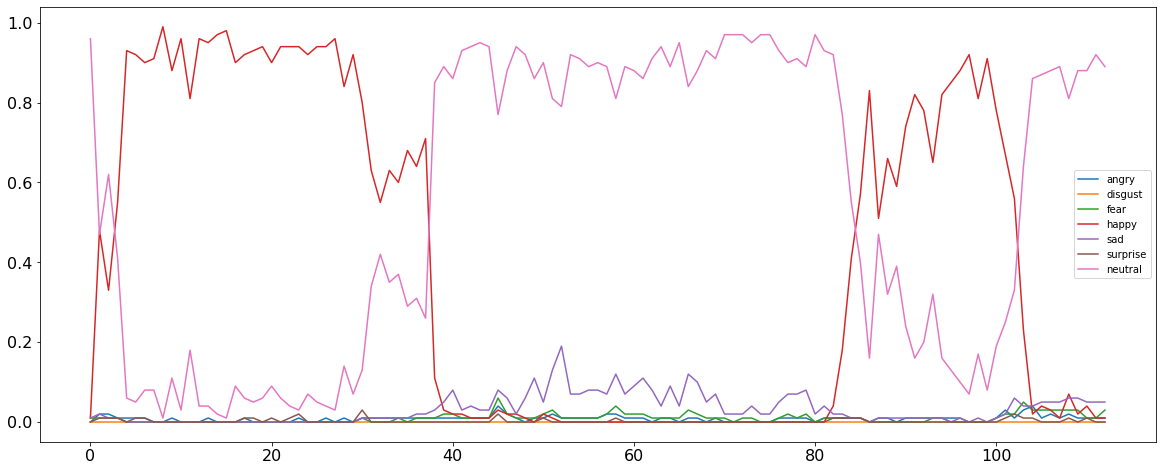

In [11]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [12]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,0.97
1,Fear,1.10
2,Happy,45.48
3,Sad,3.71
4,Surprise,0.29
5,Neutral,61.18


In [14]:
listener_mood=score_comparisons.iloc[score_comparisons['Emotion Value from the Video'].argmax()]['Human Emotions']

In [15]:
print(listener_mood)

Neutral
